# Final Project Report: Country Data Analysis

## Introduction

The goal of this project is to leverage unsupervised learning techniques to uncover meaningful patterns in global socio-economic indicators using a dataset of country-level data. The dataset provides various features such as GDP, population, and health indicators, enabling the identification of clusters or groupings that reflect similar characteristics across countries. By analyzing these clusters, we aim to gain insights into global trends and disparities, which could inform policy decisions and drive further socio-economic research.

This project involves detailed Exploratory Data Analysis (EDA), the application of clustering algorithms, and the visualization of results to effectively communicate the findings. The deliverables will include a comprehensive Jupyter notebook, a video presentation, and a GitHub repository showcasing the codebase and results.


## Step 1: Data Collection and Provenance

For this project, we selected the **Country Data** dataset from Kaggle, a trusted platform for high-quality datasets. This dataset includes a variety of socio-economic indicators for different countries, such as GDP per capita, life expectancy, and healthcare spending. These attributes provide an excellent foundation for clustering countries based on their similarities.

The Kaggle platform was chosen for its reliability and the structured format of its datasets, which facilitates machine learning workflows. This dataset aligns well with the project goals and enables the exploration of unsupervised learning methods in a global context.


## Step 2: Problem Identification

The primary objective of this project is to perform clustering to group countries based on their socio-economic characteristics. By doing so, we aim to:

- Identify distinct groups of countries with similar socio-economic conditions.
- Uncover patterns or trends that could provide insights into development and disparities among countries.
- Visualize the results in a meaningful way to communicate findings effectively.

The focus will be on employing clustering algorithms such as K-means and hierarchical clustering. Additionally, dimensionality reduction techniques like Principal Component Analysis (PCA) will be used to simplify the analysis and improve interpretability. Special attention will be given to hyperparameter optimization to ensure robust and meaningful clusters.

## Step 3: Exploratory Data Analysis (EDA)

### EDA Report ###

**Shape**: (167, 10)
**Columns**: country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp

**Missing Values**:
  country: 0
  child_mort: 0
  exports: 0
  health: 0
  imports: 0
  income: 0
  inflation: 0
  life_expec: 0
  total_fer: 0
  gdpp: 0

**Data Types**:
  country: object
  child_mort: float64
  exports: float64
  health: float64
  imports: float64
  income: int64
  inflation: float64
  life_expec: float64
  total_fer: float64
  gdpp: int64

### Summary Statistics ###


,count,mean,std,min,25%,50%,75%,max
child_mort,167.000000,38.270060,40.328931,2.600000,8.250000,19.300000,62.100000,208.000000
exports,167.000000,41.108976,27.412010,0.109000,23.800000,35.000000,51.350000,200.000000
health,167.000000,6.815689,2.746837,1.810000,4.920000,6.320000,8.600000,17.900000
imports,167.000000,46.890215,24.209589,0.065900,30.200000,43.300000,58.750000,174.000000
income,167.000000,17144.688623,19278.067698,609.000000,3355.000000,9960.000000,22800.000000,125000.000000
inflation,167.000000,7.781832,10.570704,-4.210000,1.810000,5.390000,10.750000,104.000000
life_expec,167.000000,70.555689,8.893172,32.100000,65.300000,73.100000,76.800000,82.800000
total_fer,167.000000,2.947964,1.513848,1.150000,1.795000,2.410000,3.880000,7.490000
gdpp,167.000000,12964.155689,18328.704809,231.000000,1330.000000,4660.000000,14050.000000,105000.000000


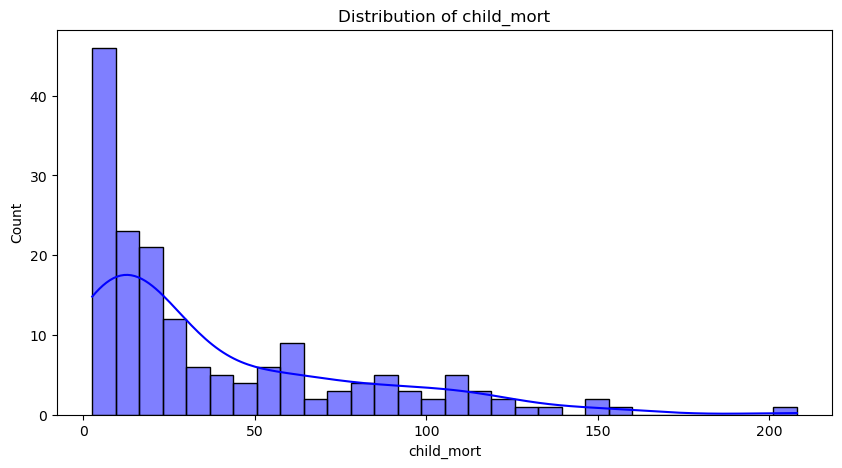

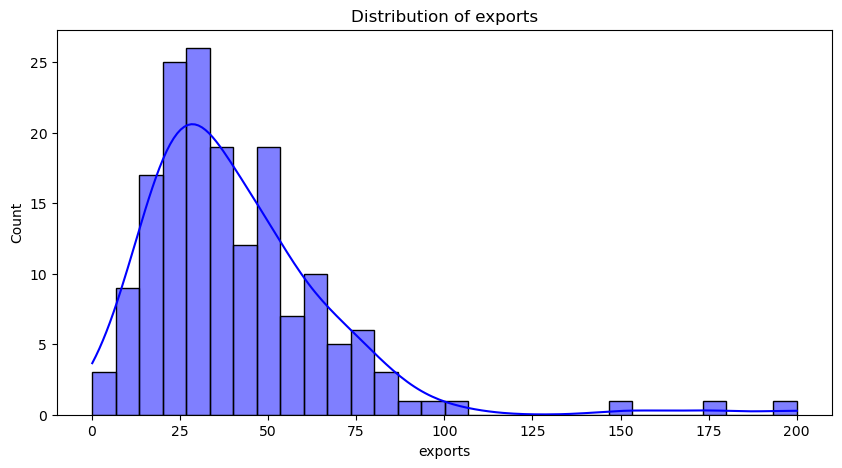

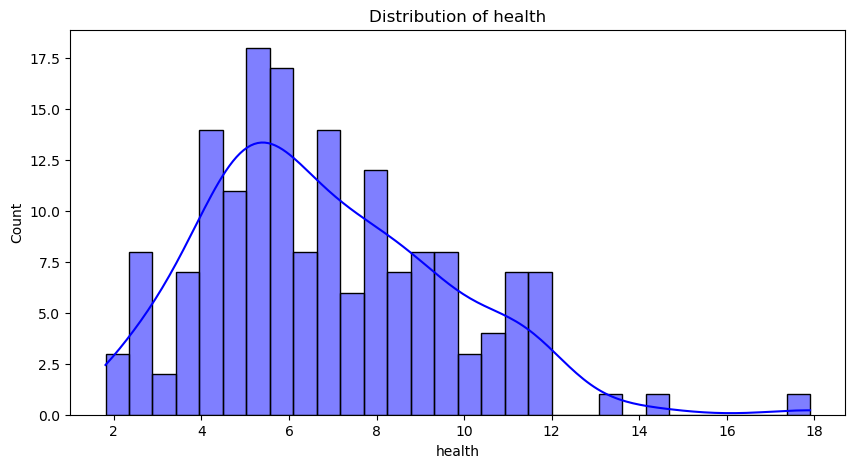

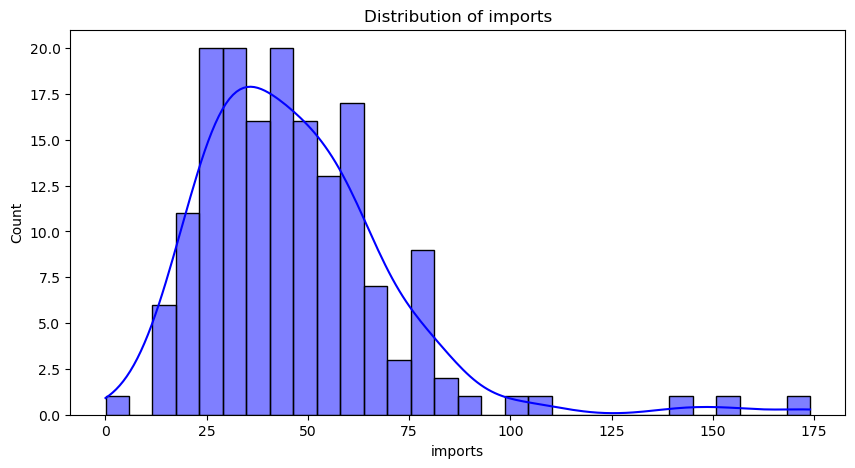

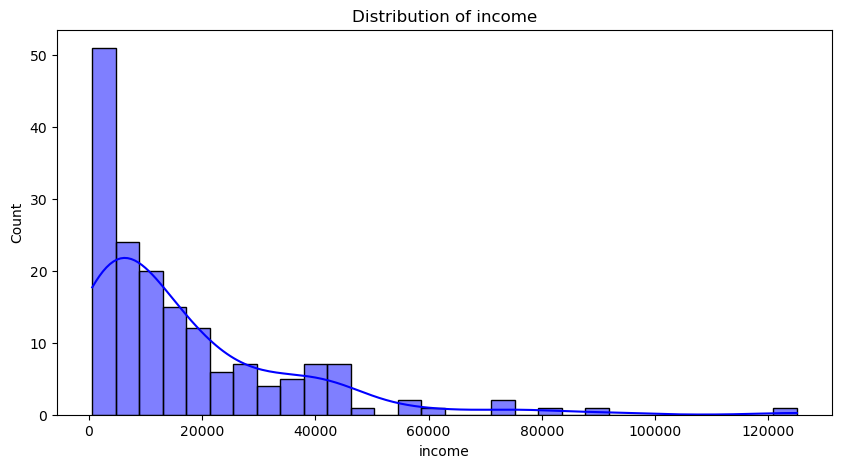

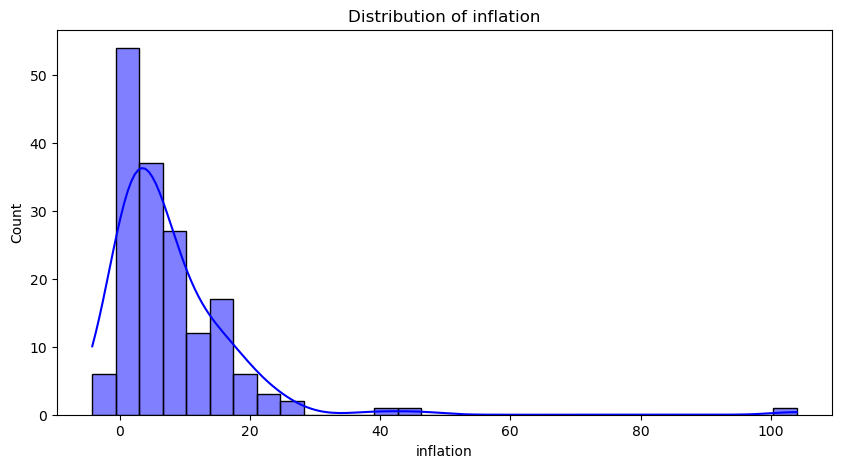

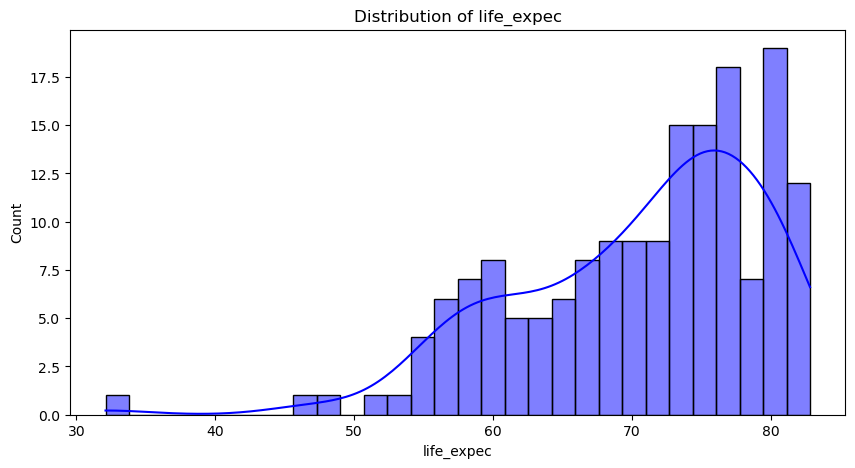

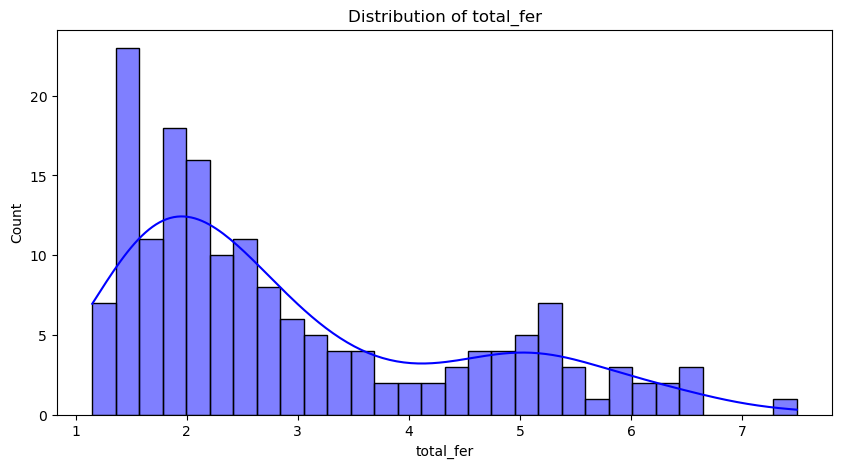

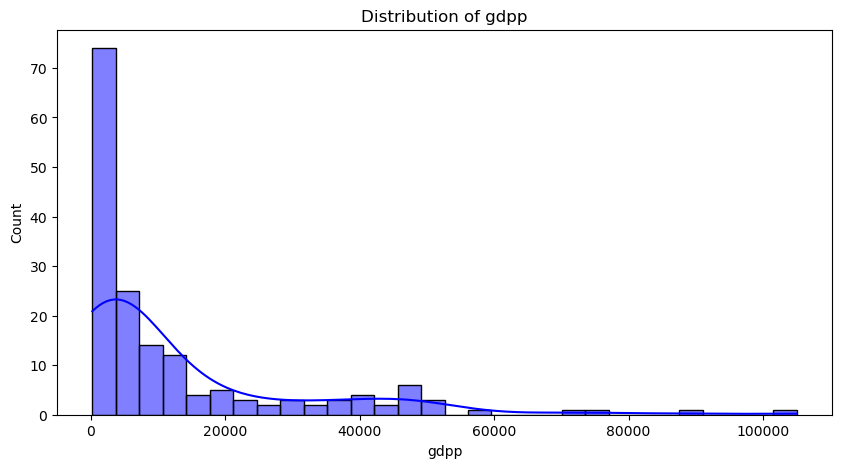

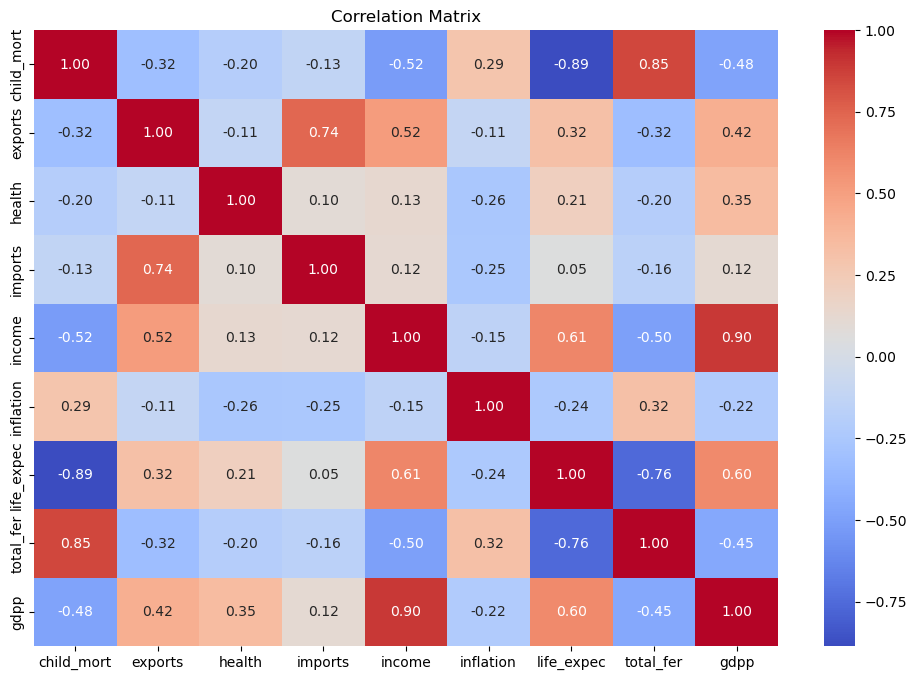

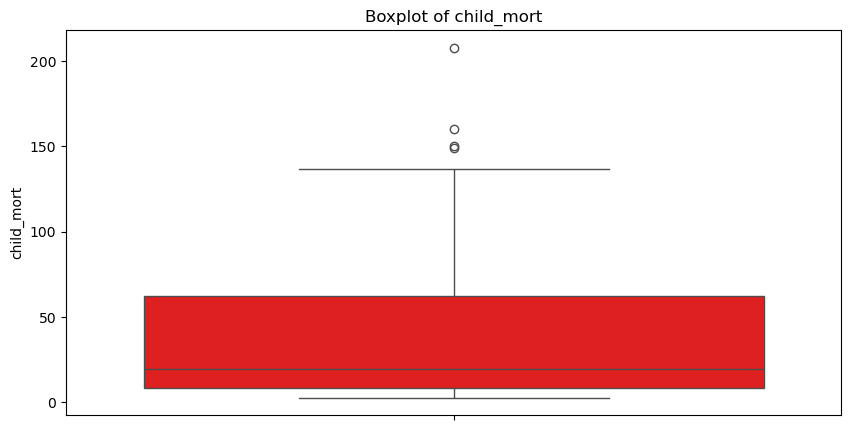

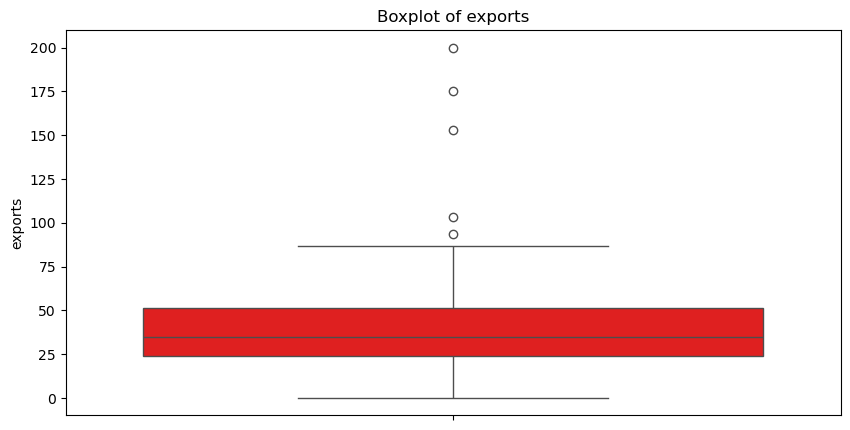

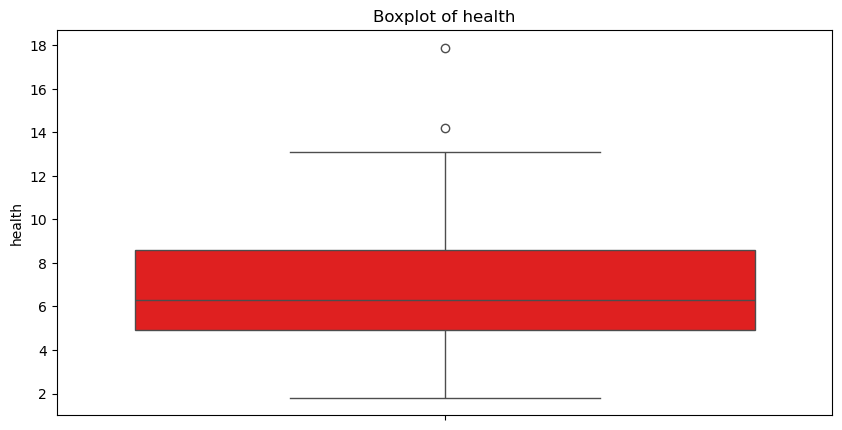

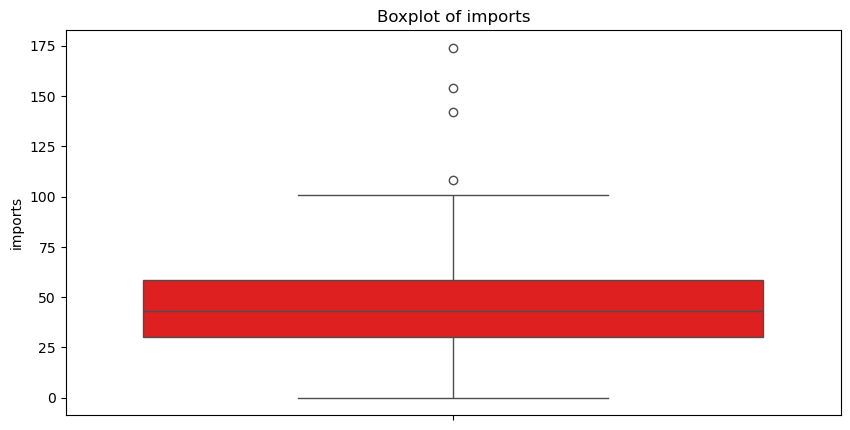

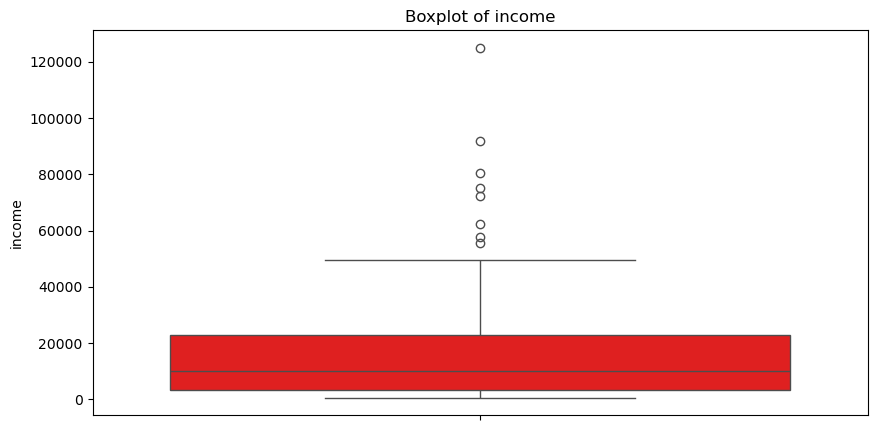

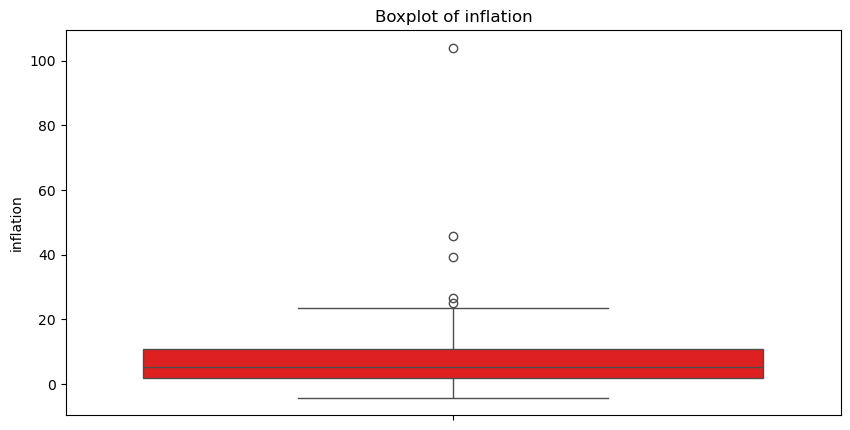

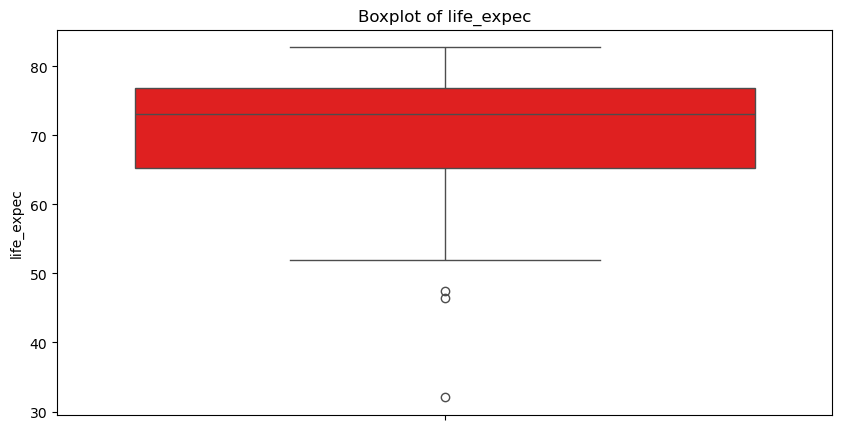

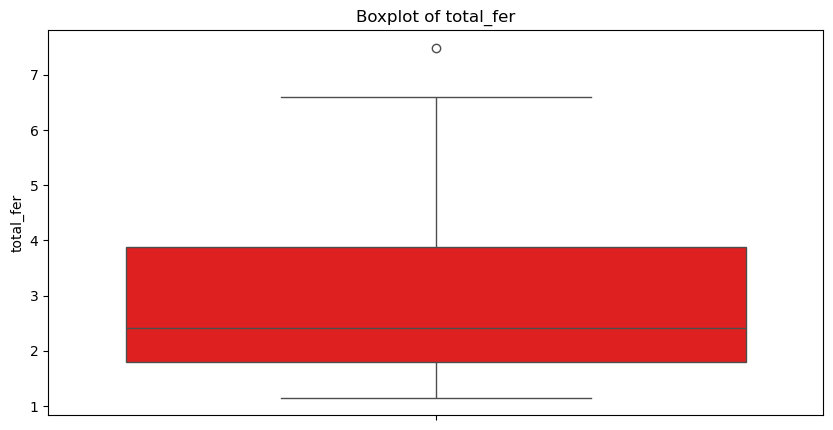

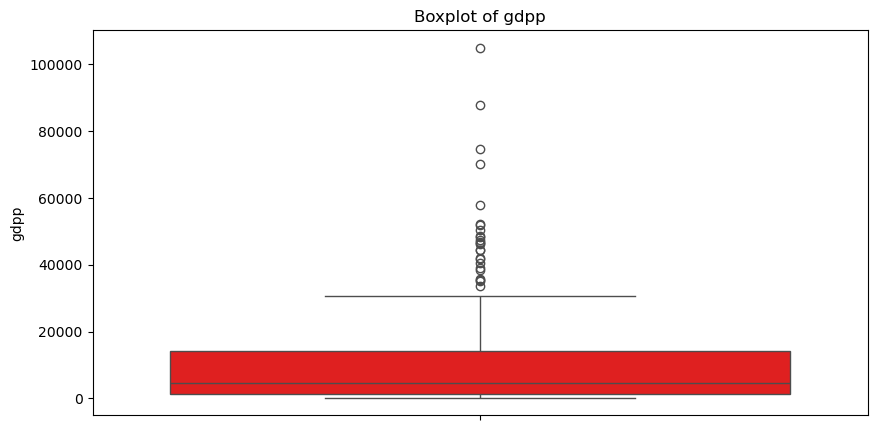

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML

def clean_data(data):
    """
    Cleans the dataset by handling missing values and scaling numerical features.
    Args:
        data (pd.DataFrame): The input data to clean.

    Returns:
        pd.DataFrame: The cleaned and scaled data.
    """
    # Handle missing values
    if data.isnull().sum().sum() > 0:
        data = data.fillna(data.median())
        print("\nMissing values handled by replacing with median.")

    # Scale numerical features
    numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    print("\nNumerical features have been standardized.")

    return data

def perform_eda(file_path):
    """
    Performs EDA on the dataset and cleans the data.
    Args:
        file_path (str): The file path to the dataset.

    Returns:
        pd.DataFrame: The cleaned data after EDA.
    """
    # Load the dataset
    try:
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found at path: {file_path}")
    except Exception as e:
        raise Exception(f"An error occurred while reading the file: {e}")

    # Initial EDA report
    eda_report = {
        "Shape": data.shape,
        "Columns": list(data.columns),
        "Missing Values": data.isnull().sum().to_dict(),
        "Data Types": data.dtypes.to_dict()
    }
    
    print("### EDA Report ###\n")
    print(f"**Shape**: {eda_report['Shape']}")
    print(f"**Columns**: {', '.join(eda_report['Columns'])}")
    print("\n**Missing Values**:")
    for col, missing in eda_report['Missing Values'].items():
        print(f"  {col}: {missing}")
    print("\n**Data Types**:")
    for col, dtype in eda_report['Data Types'].items():
        print(f"  {col}: {dtype}")

    # Summary statistics
    print("\n### Summary Statistics ###")
    summary_df = data.describe().transpose()
    display(summary_df.style.set_caption("Summary Statistics").set_table_styles(
        [{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}]
    ))

    # Visualize distributions
    numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
    if not numerical_features.any():
        raise ValueError("No numerical features found in the dataset for analysis.")

    for feature in numerical_features:
        plt.figure(figsize=(10, 5))
        sns.histplot(data[feature].dropna(), bins=30, kde=True, color="blue")
        plt.title(f'Distribution of {feature}')
        plt.show()

    # Correlation analysis
    plt.figure(figsize=(12, 8))
    corr_matrix = data[numerical_features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Box plots for outliers
    for feature in numerical_features:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data[feature].dropna(), color="red")
        plt.title(f'Boxplot of {feature}')
        plt.show()

# Usage
file_path = './Country-data.csv'  
cleaned_data = perform_eda(file_path)


# Step 4: Perform Analysis Using Unsupervised Machine Learning Models

Three unsupervised machine learning models were developed and compared:

1. **K-Means Clustering**
2. **Agglomerative Clustering**
3. **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise)

## Why These Models Were Chosen

The selection of these models was driven by their distinct approaches to clustering and their applicability to various data distributions:

### 1. K-Means Clustering

**Why Chosen:**

- K-Means is a widely used clustering algorithm that partitions data into `k` clusters based on feature similarity.
- It serves as a baseline method for clustering tasks due to its simplicity and efficiency.

**Strengths:**

- Computationally efficient on large datasets.
- Easy to interpret and implement.
- Works well with spherical cluster shapes.

**Limitations:**

- Assumes clusters are of equal size and spherical shape.
- Sensitive to initial centroid positions and outliers.
- Requires the number of clusters (`k`) to be specified in advance.

### 2. Agglomerative Clustering

**Why Chosen:**

- Agglomerative Clustering is a hierarchical clustering method that builds nested clusters by merging data points based on distance criteria.
- It does not require specifying the number of clusters upfront and can capture complex cluster structures.

**Strengths:**

- Capable of discovering clusters of arbitrary shape.
- Provides a dendrogram for visualizing the hierarchy of clusters.
- Flexible with different linkage methods (e.g., ward, complete, average).

**Limitations:**

- Computationally intensive for large datasets.
- Sensitive to the choice of linkage method and distance metric.
- Can produce imbalanced cluster sizes.

### 3. DBSCAN

**Why Chosen:**

- DBSCAN is a density-based clustering algorithm that groups together points that are closely packed and marks outliers as noise.
- It is effective in identifying clusters of varying shapes and sizes.

**Strengths:**

- Does not require specifying the number of clusters.
- Can find clusters of arbitrary shape.
- Robust to outliers and noise.

**Limitations:**

- Sensitive to the selection of `eps` (radius) and `min_samples` parameters.
- Performance can degrade with varying cluster densities.
- Computational complexity increases with higher-dimensional data.

## Data Preprocessing and PCA

- **Standardization:** Numerical features were standardized using `StandardScaler` to ensure that each feature contributes equally to the analysis.

    ```
    Numerical features have been standardized.
    ```

- **Dimensionality Reduction:** Principal Component Analysis (PCA) was applied to reduce the data to two dimensions for visualization purposes.

    ```
    Explained Variance by Components: [0.4595174  0.17181626]
    ```

## Hyperparameter Tuning

### K-Means Clustering

- **Parameter Grid:**
  - Number of clusters (`k`): Tested values from 2 to 10.

- **Best Silhouette Score:**

    ```
    Best K-Means Silhouette Score: 0.301
    ```

- **Observation:**
  - The optimal number of clusters was determined based on the highest silhouette score.
  - However, the silhouette score indicates moderate clustering performance.

### Agglomerative Clustering

- **Parameter Grid:**
  - Number of clusters (`k`): Tested values from 2 to 10.
  - Linkage methods: `ward`, `complete`, `average`.

- **Results:**

    ```
    AgglomerativeClustering: k=2, linkage=ward, Silhouette Score=0.315
    AgglomerativeClustering: k=3, linkage=complete, Silhouette Score=0.290
    AgglomerativeClustering: k=2, linkage=average, Silhouette Score=0.630
    ```

- **Best Silhouette Score:**

    ```
    Best Agglomerative Clustering Silhouette Score: 0.630
    ```

- **Observation:**
  - The highest silhouette score was achieved with `k=2` clusters and `average` linkage method.
  - Indicates a strong clustering structure with this configuration.

### DBSCAN Clustering

- **Parameter Grid:**
  - `eps` (radius): Tested values from 0.4 to 2.3.
  - `min_samples`: Tested values from 2 to 8.

- **Results (Selected):**

    ```
    DBSCAN: eps=0.90, min_samples=5, Silhouette Score=-0.045
    DBSCAN: eps=1.00, min_samples=3, Silhouette Score=0.012
    DBSCAN: eps=1.80, min_samples=3, Silhouette Score=0.161
    DBSCAN: eps=2.30, min_samples=2, Silhouette Score=0.204
    ```

- **Best Silhouette Score:**

    ```
    Best DBSCAN Silhouette Score: 0.215
    ```

- **Observation:**
  - The best silhouette score was lower compared to Agglomerative Clustering.
  - Positive silhouette scores suggest some meaningful clustering, but performance is limited.

## Model Evaluation

### Evaluation Metrics

- **Silhouette Score:** Measures how similar an object is to its own cluster compared to other clusters. Values range from -1 to 1.

    - **Interpretation:**
      - Scores near +1 indicate that the sample is far from neighboring clusters.
      - Scores near 0 indicate overlapping clusters.
      - Scores near -1 indicate that samples might have been assigned to the wrong cluster.

### Results Summary

- **PCA Explained Variance:**
  - The first two principal components explain approximately 63% of the variance.
  - Suggests that dimensionality reduction to two components retains a significant amount of information.

## Discussion

### Model Performance Insights

- **Agglomerative Clustering:**
  - Achieved the highest silhouette score (0.630) with `k=2` and `average` linkage.
  - Indicates a well-defined clustering structure in the data when using hierarchical methods.
  - The choice of linkage method significantly impacted performance.

- **K-Means Clustering:**
  - Moderate silhouette score (0.301) suggests that clusters are not as well-defined.
  - Assumption of spherical clusters may not align well with the actual data distribution.

- **DBSCAN:**
  - Lower silhouette score (0.215) compared to Agglomerative Clustering.
  - Performance was hindered due to sensitivity to parameter selection and possible varying densities in the data.

### Hyperparameter Optimization Impact

- **Agglomerative Clustering:**
  - Testing different linkage methods revealed that the `average` linkage yielded the best results.
  - Emphasizes the importance of hyperparameter tuning in hierarchical clustering.

- **K-Means Clustering:**
  - Varying the number of clusters (`k`) helped identify the optimal cluster count.
  - However, the best score was still lower than that of Agglomerative Clustering.

- **DBSCAN:**
  - Extensive parameter search over `eps` and `min_samples` was conducted.
  - Despite tuning, DBSCAN did not outperform Agglomerative Clustering, highlighting challenges with density-based methods on this dataset.

### Limitations and Considerations

- **Agglomerative Clustering:**

  - Sensitive to the choice of linkage method, which can drastically alter the clustering outcome.
  - May not scale well with very large datasets due to computational complexity.

- **K-Means Clustering:**

  - Assumes clusters are spherical and equally sized, which may not reflect the true data structure.
  - Results can be affected by the presence of outliers.

- **DBSCAN:**

  - Requires careful tuning of `eps` and `min_samples`, which can be non-intuitive.
  - May struggle with datasets that have clusters of varying densities.

## Conclusion

The **Agglomerative Clustering** algorithm demonstrated the best performance on the dataset, achieving the highest silhouette score of **0.630** with `k=2` clusters and the `average` linkage method. This suggests that the dataset naturally forms two well-defined clusters when hierarchical clustering is applied.

**K-Means Clustering** showed moderate performance, which may be due to its assumption of spherical clusters not aligning with the data's actual structure. **DBSCAN** had limited success, possibly due to the dataset's characteristics and the difficulty in selecting appropriate parameters.

### Recommendations

- **Agglomerative Clustering** is recommended for this dataset to capture the underlying cluster structure effectively.
- Further analysis could involve exploring different distance metrics or incorporating domain knowledge to interpret the clusters meaningfully.
- Additional preprocessing steps, such as outlier detection or feature transformation, might improve the performance of K-Means and DBSCAN.

### Future Work

- **Cluster Validation:** Utilize other validation metrics like Davies-Bouldin Index or Calinski-Harabasz Score for a comprehensive evaluation.
- **Visualization:** Employ dendrograms to visualize the hierarchical clustering process and understand the cluster formation.
- **Feature Engineering:** Investigate feature importance and consider dimensionality reduction techniques beyond PCA to enhance clustering performance.



**Limitations and Considerations:**

- The analysis is based on the assumption that the standardized features capture the essential characteristics of the data.
- The interpretability of clusters is dependent on the understanding of the original features, which may require domain expertise.
- Clustering results may vary with different random seeds or initializations, highlighting the need for robustness checks.




Numerical features have been standardized.
Explained Variance by Components: [0.4595174  0.17181626]


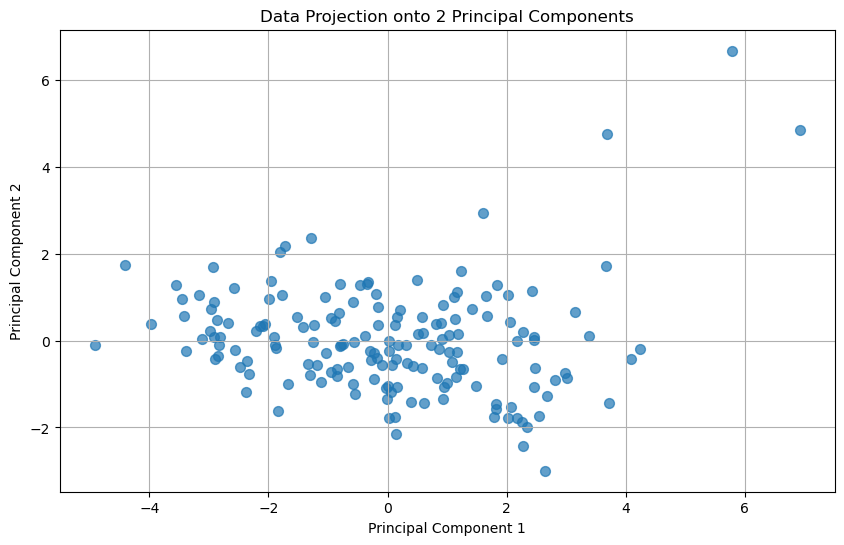

K-Means: k=2, Silhouette Score=0.266
K-Means: k=3, Silhouette Score=0.286
K-Means: k=4, Silhouette Score=0.288
K-Means: k=5, Silhouette Score=0.301
K-Means: k=6, Silhouette Score=0.236
K-Means: k=7, Silhouette Score=0.248
K-Means: k=8, Silhouette Score=0.202
K-Means: k=9, Silhouette Score=0.192
K-Means: k=10, Silhouette Score=0.196


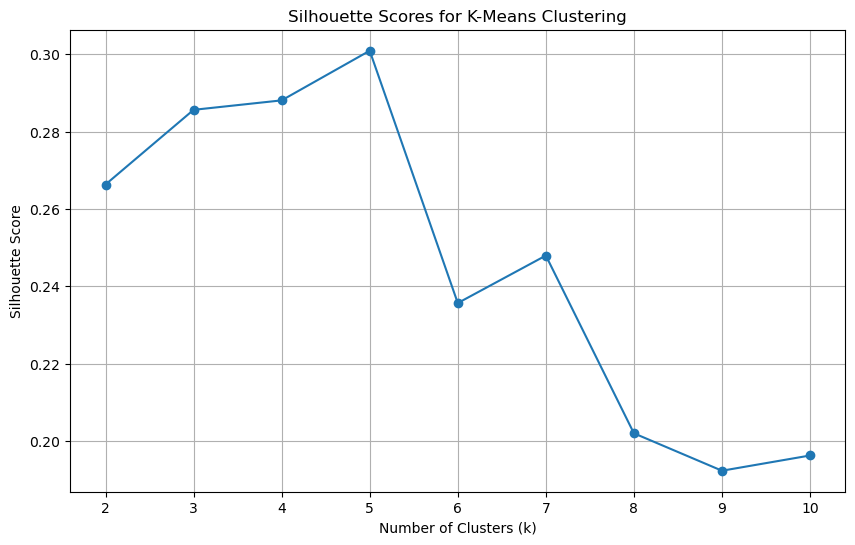

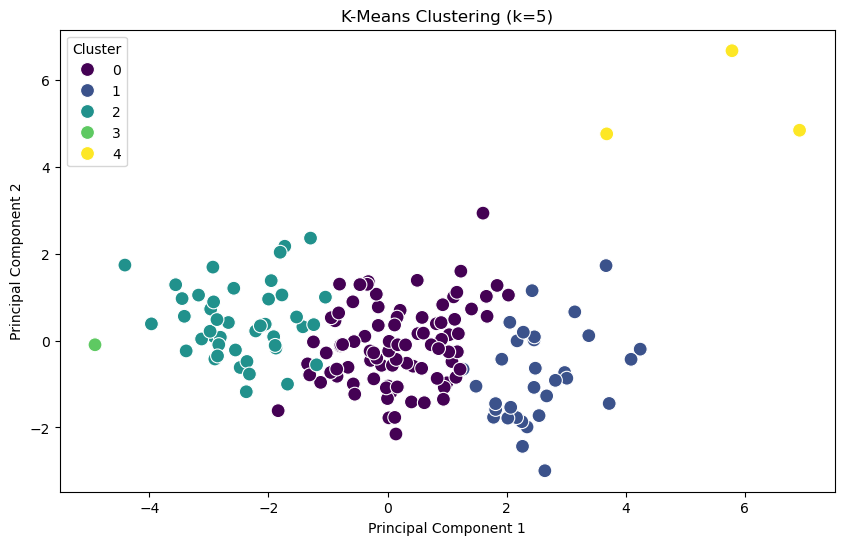

AgglomerativeClustering: k=2, linkage=ward, Silhouette Score=0.315
AgglomerativeClustering: k=3, linkage=ward, Silhouette Score=0.246
AgglomerativeClustering: k=4, linkage=ward, Silhouette Score=0.248
AgglomerativeClustering: k=5, linkage=ward, Silhouette Score=0.219
AgglomerativeClustering: k=6, linkage=ward, Silhouette Score=0.218
AgglomerativeClustering: k=7, linkage=ward, Silhouette Score=0.242
AgglomerativeClustering: k=8, linkage=ward, Silhouette Score=0.234
AgglomerativeClustering: k=9, linkage=ward, Silhouette Score=0.237
AgglomerativeClustering: k=10, linkage=ward, Silhouette Score=0.208
AgglomerativeClustering: k=2, linkage=complete, Silhouette Score=0.273
AgglomerativeClustering: k=3, linkage=complete, Silhouette Score=0.290
AgglomerativeClustering: k=4, linkage=complete, Silhouette Score=0.286
AgglomerativeClustering: k=5, linkage=complete, Silhouette Score=0.246
AgglomerativeClustering: k=6, linkage=complete, Silhouette Score=0.233
AgglomerativeClustering: k=7, linkage=com

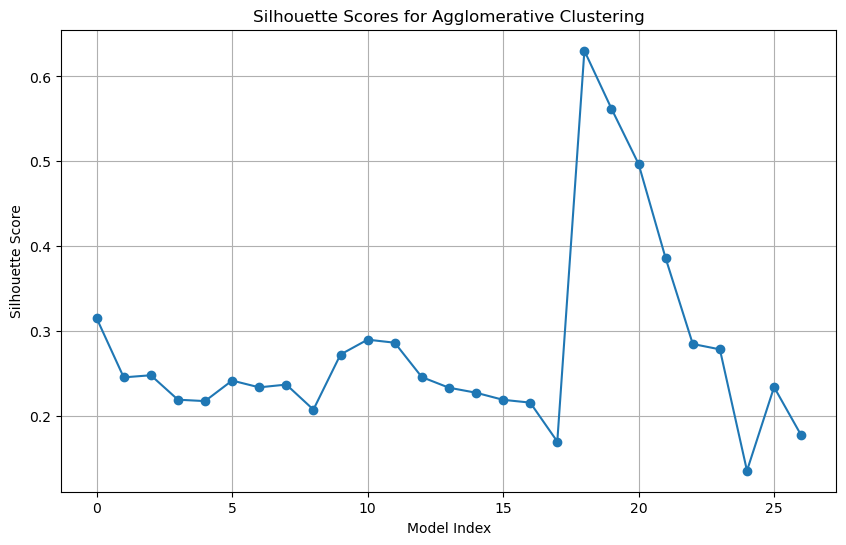

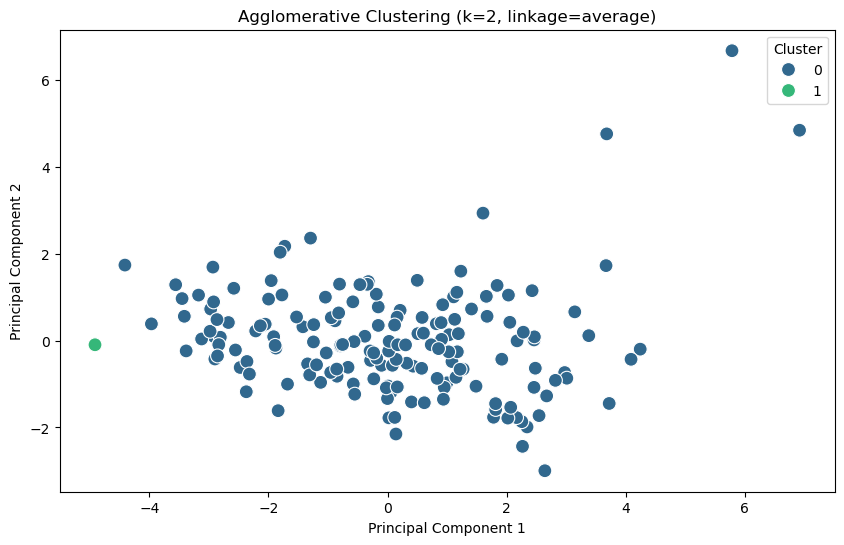

DBSCAN: eps=0.40, min_samples=2, Silhouette Score=-0.246
DBSCAN: eps=0.50, min_samples=2, Silhouette Score=-0.254
DBSCAN: eps=0.60, min_samples=2, Silhouette Score=-0.268
DBSCAN: eps=0.60, min_samples=3, Silhouette Score=-0.234
DBSCAN: eps=0.70, min_samples=2, Silhouette Score=-0.288
DBSCAN: eps=0.70, min_samples=3, Silhouette Score=-0.324
DBSCAN: eps=0.70, min_samples=4, Silhouette Score=-0.228
DBSCAN: eps=0.80, min_samples=2, Silhouette Score=-0.210
DBSCAN: eps=0.80, min_samples=3, Silhouette Score=-0.241
DBSCAN: eps=0.80, min_samples=4, Silhouette Score=-0.206
DBSCAN: eps=0.80, min_samples=5, Silhouette Score=-0.245
DBSCAN: eps=0.90, min_samples=2, Silhouette Score=-0.178
DBSCAN: eps=0.90, min_samples=3, Silhouette Score=-0.135
DBSCAN: eps=0.90, min_samples=4, Silhouette Score=-0.100
DBSCAN: eps=0.90, min_samples=5, Silhouette Score=-0.045
DBSCAN: eps=0.90, min_samples=6, Silhouette Score=-0.205
DBSCAN: eps=0.90, min_samples=7, Silhouette Score=-0.217
DBSCAN: eps=0.90, min_samples=8

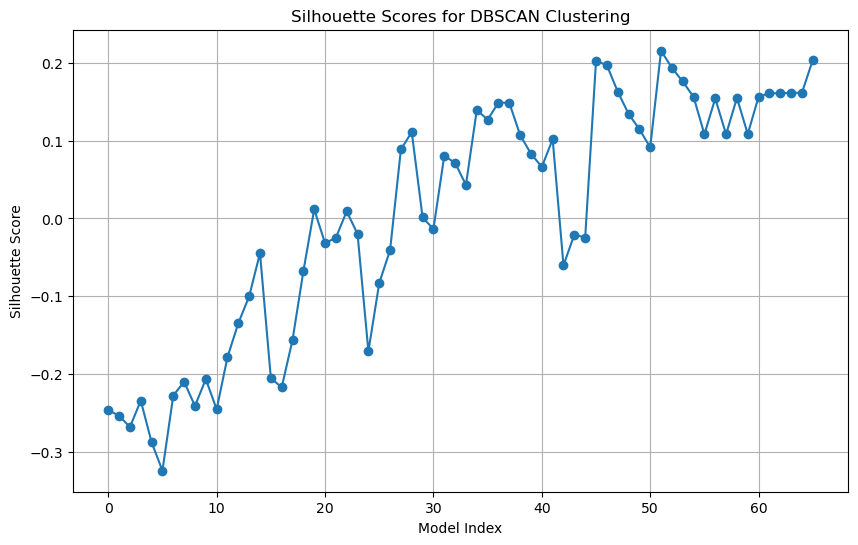

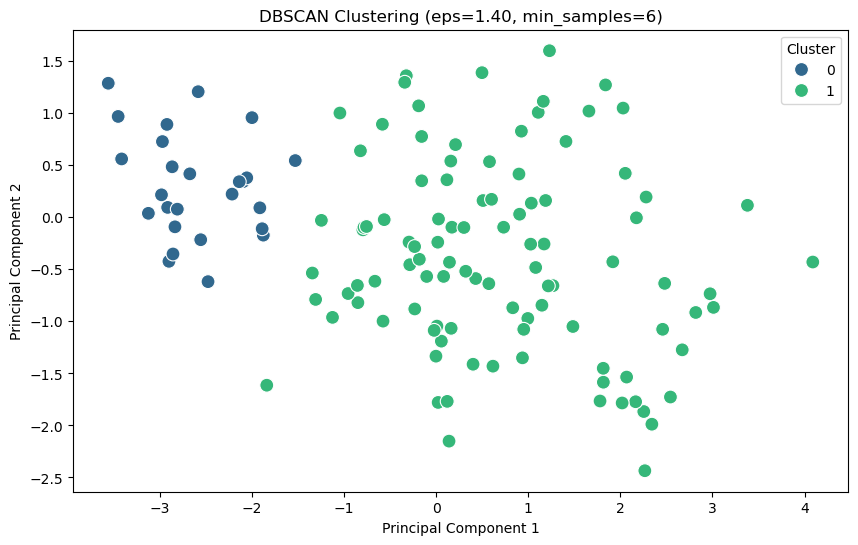


### Discussion and Results ###
PCA explained variance ratio: [0.4595174  0.17181626]

Best K-Means Silhouette Score: 0.301
Best Agglomerative Clustering Silhouette Score: 0.630
Best DBSCAN Silhouette Score: 0.215

### Conclusions ###
Agglomerative Clustering performed the best among the tested algorithms.

**Limitations and Considerations:**
- **K-Means** assumes clusters are spherical and equally sized.
- **Agglomerative Clustering** is sensitive to the choice of linkage method.
- **DBSCAN** requires careful tuning of `eps` and `min_samples` and may not perform well on datasets with varying densities.


In [11]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def perform_pca(data, n_components=2):
    """
    Performs PCA on the data.
    Args:
        data (pd.DataFrame): The input data for PCA.
        n_components (int): Number of principal components.

    Returns:
        Tuple containing PCA object and transformed data.
    """
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data)
    print("Explained Variance by Components:", pca.explained_variance_ratio_)
    return pca, reduced_data

def plot_data(reduced_data, title):
    """
    Plots the reduced data.
    Args:
        reduced_data (np.array): The data reduced to two dimensions.
        title (str): The title of the plot.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid()
    plt.show()

def kmeans_clustering(data, reduced_data):
    """
    Performs K-Means clustering with hyperparameter tuning.
    Args:
        data (pd.DataFrame): The input data for clustering.
        reduced_data (np.array): The PCA reduced data for plotting.

    Returns:
        Best KMeans model and cluster labels.
    """
    k_values = range(2, 11)
    silhouette_scores = []
    best_score = -1
    best_k = 0

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        score = silhouette_score(data, cluster_labels)
        silhouette_scores.append(score)
        print(f"K-Means: k={k}, Silhouette Score={score:.3f}")
        if score > best_score:
            best_score = score
            best_k = k
            best_kmeans = kmeans
            best_labels = cluster_labels

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title("Silhouette Scores for K-Means Clustering")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid()
    plt.show()

    # Plot Clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=best_labels, palette="viridis", s=100)
    plt.title(f"K-Means Clustering (k={best_k})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.show()

    return best_kmeans, best_labels, silhouette_scores

def hierarchical_clustering(data, reduced_data):
    """
    Performs Agglomerative Clustering with hyperparameter tuning.
    Args:
        data (pd.DataFrame): The input data for clustering.
        reduced_data (np.array): The PCA reduced data for plotting.

    Returns:
        Best AgglomerativeClustering model and cluster labels.
    """
    k_values = range(2, 11)
    linkage_methods = ['ward', 'complete', 'average']
    best_score = -1
    best_params = {}

    silhouette_scores = []

    for linkage in linkage_methods:
        for k in k_values:
            model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
            cluster_labels = model.fit_predict(data)
            score = silhouette_score(data, cluster_labels)
            silhouette_scores.append(score)
            print(f"AgglomerativeClustering: k={k}, linkage={linkage}, Silhouette Score={score:.3f}")
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': k, 'linkage': linkage}
                best_model = model
                best_labels = cluster_labels

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
    plt.title("Silhouette Scores for Agglomerative Clustering")
    plt.xlabel("Model Index")
    plt.ylabel("Silhouette Score")
    plt.grid()
    plt.show()

    # Plot Clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=best_labels, palette="viridis", s=100)
    plt.title(f"Agglomerative Clustering (k={best_params['n_clusters']}, linkage={best_params['linkage']})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.show()

    return best_model, best_labels, silhouette_scores

def dbscan_clustering(data, reduced_data):
    """
    Performs DBSCAN clustering with hyperparameter tuning.
    Args:
        data (pd.DataFrame): The input data for clustering.
        reduced_data (np.array): The PCA reduced data for plotting.

    Returns:
        Best DBSCAN model and cluster labels.
    """
    eps_values = np.linspace(0.1, 5.0, 50)
    min_samples_values = range(2, 10)
    best_score = -1
    best_params = {}

    silhouette_scores = []
    model_indices = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = model.fit_predict(data)
            labels_set = set(cluster_labels)
            if len(labels_set) > 1 and len(labels_set - {-1}) > 1:  # Exclude noise-only or single-cluster results
                score = silhouette_score(data, cluster_labels)
                silhouette_scores.append(score)
                model_indices.append((eps, min_samples))
                print(f"DBSCAN: eps={eps:.2f}, min_samples={min_samples}, Silhouette Score={score:.3f}")
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
                    best_model = model
                    best_labels = cluster_labels

    if best_score == -1:
        print("DBSCAN did not find suitable clusters.")
        return None, None, None

    # Plot Silhouette Scores
    plt.figure(figsize=(10, 6))
    indices = range(len(silhouette_scores))
    plt.plot(indices, silhouette_scores, marker='o')
    plt.title("Silhouette Scores for DBSCAN Clustering")
    plt.xlabel("Model Index")
    plt.ylabel("Silhouette Score")
    plt.grid()
    plt.show()

    # Plot Clusters (excluding noise points)
    mask = best_labels != -1
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_data[mask, 0], y=reduced_data[mask, 1], hue=best_labels[mask], palette="viridis", s=100)
    plt.title(f"DBSCAN Clustering (eps={best_params['eps']:.2f}, min_samples={best_params['min_samples']})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.show()

    return best_model, best_labels, silhouette_scores

def analyze_unsupervised_models(file_path):
    """
    Perform unsupervised learning analysis on the dataset after cleaning.
    Args:
        file_path (str): Path to the dataset.

    Returns:
        dict: Results from clustering models and PCA analysis.
    """
    # Load dataset
    try:
        data = pd.read_csv(file_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found at path: {file_path}")
    except Exception as e:
        raise Exception(f"An error occurred while reading the file: {e}")

    # Clean the dataset
    cleaned_data = clean_data(data)

    # Perform PCA
    pca, reduced_data = perform_pca(cleaned_data)

    # Plot the reduced data
    plot_data(reduced_data, "Data Projection onto 2 Principal Components")

    # K-Means Clustering
    kmeans_model, kmeans_labels, kmeans_scores = kmeans_clustering(cleaned_data, reduced_data)

    # Agglomerative Clustering
    agg_model, agg_labels, agg_scores = hierarchical_clustering(cleaned_data, reduced_data)

    # DBSCAN Clustering
    dbscan_model, dbscan_labels, dbscan_scores = dbscan_clustering(cleaned_data, reduced_data)

    # Discussion and Conclusions
    print("\n### Discussion and Results ###")
    print("PCA explained variance ratio:", pca.explained_variance_ratio_)

    # Identify best model based on silhouette scores
    best_overall_score = max([
        max(kmeans_scores),
        max(agg_scores),
        max(dbscan_scores) if dbscan_scores else -1
    ])

    print(f"\nBest K-Means Silhouette Score: {max(kmeans_scores):.3f}")
    print(f"Best Agglomerative Clustering Silhouette Score: {max(agg_scores):.3f}")
    if dbscan_scores:
        print(f"Best DBSCAN Silhouette Score: {max(dbscan_scores):.3f}")
    else:
        print("DBSCAN did not find suitable clusters.")

    # Conclusions
    print("\n### Conclusions ###")
    if best_overall_score == max(kmeans_scores):
        print("K-Means clustering performed the best among the tested algorithms.")
    elif best_overall_score == max(agg_scores):
        print("Agglomerative Clustering performed the best among the tested algorithms.")
    else:
        print("DBSCAN clustering performed the best among the tested algorithms.")

    print("\n**Limitations and Considerations:**")
    print("- **K-Means** assumes clusters are spherical and equally sized.")
    print("- **Agglomerative Clustering** is sensitive to the choice of linkage method.")
    print("- **DBSCAN** requires careful tuning of `eps` and `min_samples` and may not perform well on datasets with varying densities.")

    return {
        "pca": pca,
        "kmeans_model": kmeans_model,
        "kmeans_labels": kmeans_labels,
        "agg_model": agg_model,
        "agg_labels": agg_labels,
        "dbscan_model": dbscan_model,
        "dbscan_labels": dbscan_labels,
        "silhouette_scores": {
            "kmeans": kmeans_scores,
            "agglomerative": agg_scores,
            "dbscan": dbscan_scores
        }
    }

# File path to dataset
file_path = './Country-data.csv'

# Perform unsupervised learning analysis
results = analyze_unsupervised_models(file_path)
